---
# <center> **Foundations of Applied Machine Learning**
## <center> Summer 2025

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **Sanaz Imanlou** | email: *sanaz.imanlou@email.ucr.edu* | [Course webpage](https://github.com/sanaz007/PHYS_243)
### <center> Week 2: Object Oriented Programming and Bayes Rule
---

## ========================
## Object Oriented Programming
## ========================

**Object-Oriented Programming (OOP)** is a programming paradigm that organizes software design around data, or objects, rather than functions and logic. An object is a collection of data (attributes) and methods (functions) that act on the data. OOP concepts help in making the code more modular, reusable, and easier to manage. <br>

**Key Concepts of OOP** <br>
- Class: A blueprint for creating objects. It defines a set of attributes and methods that the created objects will have. <br>
- Object: An instance of a class. It represents an entity with attributes and behavior defined by its class. <br>
- Attributes: Variables that hold data specific to an object. <br>
- Methods: Functions defined within a class that describe the behaviors of the objects. <br>

**Python Classes and Components**
- Class Definition: The class keyword is used to define a class. <br>
- Attributes: These are variables that belong to the class and its objects. <br>
- Methods: These are functions that belong to the class and define behaviors of the objects. <br>
- Initializer (__init__ method): A special method that is called when an object is instantiated. It initializes the object's attributes. <br>

#### Example 1

In [19]:
class Dog:
    # class attributes
    species = 'Canis familiaris'
    
    # Initializer / Instance Attributes
    def __init__(self,name, age):
        self.name=name 
        self.age=age
        
    
    # Instance Method 1
    def description(self):
        return f"{self.name} is {self.age} years old"
      
    
    # Instance Method 2
    def speak(self, sound):
        return f"{self.name} says {sound}"
        

In [20]:
dog_1=Dog("Bubby", 3)
dog_2=Dog("Tommy", 5)

In [21]:
print(dog_1.species)

Canis familiaris


In [22]:
print(dog_1.name)

Bubby


In [23]:
print(dog_2.description())

Tommy is 5 years old


In [24]:
print(dog_1.speak("Woof Woof"))

Bubby says Woof Woof


#### Example 2

In [25]:
class Polynomial:
    def __init__(self, coeff):
        self.coeff=coeff
    
    def value(self, x):
        self.x=0
        for i, c in enumerate(self.coeff):
            self.x += c * pow(x,i)
        return self.x
    def __repr__(self):
        string=""
        for i, c in enumerate(self.coeff):
            if c==0:
                continue
            string= string + " " + str(c) + "* x^" + str(i)

            if i != len(self.coeff)-1:
                string = string + " + "
        return string




In [26]:
p1 = Polynomial([1, 2, 5, 1])

In [27]:
p1.value(2)

33

In [28]:
p1.__repr__()

' 1* x^0 +  2* x^1 +  5* x^2 +  1* x^3'

In [29]:
p1

 1* x^0 +  2* x^1 +  5* x^2 +  1* x^3

## =================================
## Introduction to Probabilistic Programming
## =================================
Probabilistic Programming is a programming paradigm designed to deal with uncertainty in data and models. It allows us to define complex probabilistic models and perform inference in these models to make predictions or understand the data better. Probabilistic programming languages and tools provide a framework for specifying probabilistic models in a concise and understandable way. <br>

**Key Concepts:** <br>
- Probability Distributions: Mathematical functions that describe the likelihood of different outcomes. <br>
- Bayesian Inference: A method of statistical inference that updates the probability for a hypothesis as more evidence or information becomes available. <br>
- Probabilistic Models: Models that incorporate uncertainty by defining distributions over variables. <br>

In [30]:
import numpy as np
import matplotlib.pyplot as plt


First, we need a gaussian function. We can use built-in functions in numpy for getting a gaussian function. However, let's define it ourself  as a practice:

In [31]:
def Gaussian_prob(x, _mu = 0, _sigma = 1):
    """ 
    Gaussian Distribution
    
    Probability of getting x given mu and sigma
    
    """
    return (1/np.sqrt(2*np.pi*_sigma**2))*np.exp(-(x-_mu)**2/(2*_sigma**2))

In [32]:
x_span = np.linspace(0, 20, 1000)
mu, sigma = 10, 5
prob_list = [Gaussian_prob(x, mu, sigma) for x in x_span]

Another equivalent way of doing the above but using the numpy arrays.

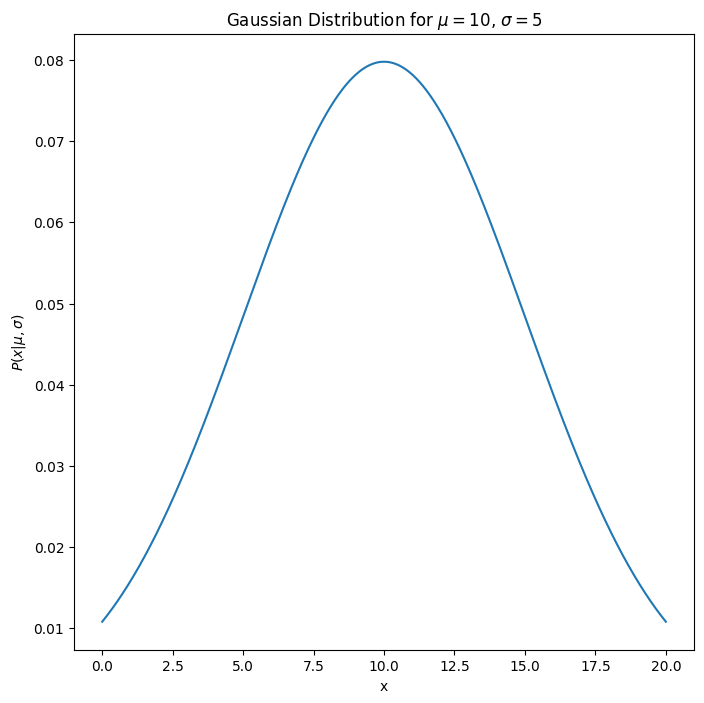

In [33]:
plt.figure(figsize=(8, 8))
plt.plot(x_span, prob_list)

plt.title("Gaussian Distribution for $\mu={}$, $\sigma={}$".format(mu, sigma))
plt.xlabel("x")
plt.ylabel("$P(x|\mu, \sigma)$")

plt.show()

<hr>

## **Particle X** 
### What is the **True** mass of the newly discovered X particle?

<hr>

Imagine that you are a Primary investigator for one particular experiment done at the [**CERN**](https://home.cern/) (The world's most powerful particle accelerator). There was a new experiment that led to the discovery of particle X. But, there has been a lot of debate about the actual mass of the particle. So, you asked **ATLAS** and **CMS** team to measure the mass of the particle entirely separate from each other. (These are two different detectors at CERN) They gave you the following results for the mass and the corresponding error. (in  an unknown unit!!!)


$$
\begin{gather}
M_{ATLAS} = 10.12 \pm 3.7 \\
M_{CMS} = 7.42 \pm 1.6
\end{gather}
$$

In [34]:
mass_atlas, mass_err_atlas = 10.12, 3.7
mass_cms, mass_err_cms = 7.42, 1.6

You have to hold a news conference to announce the discovery as well as the measured mass. So, how can you find the value for the actual mass of the particle? In other words, how can you find this value, using **all** the information about these two measurements?

The easiest way that comes to mind is to report the average of these values as the best representation of the **True** value of the mass:

In [35]:
mass_average = (mass_atlas + mass_cms)/2
print(mass_average)

8.77


#### <span style="color:red">_But there is huge problem with this analysis!!!_</span>

The lead investigator of the CMS team calls you and asks for an explanation for your decision to report the average. Since he argues that the measurement done by the ATLAS team is not as valid as the CMS team since the ATLAS team has much higher uncertainty in their experiment. But in your analysis, you are giving both these measurements the same weight by averaging them. **How can you take into account the difference in uncertainty in your report?**

$ X_1 $: mass_atlas, mass_err_atlas  
$ X_2 $: mass_cms, mass_err_cms  

Basically, what is the $p(m_X|X_1, X_2)$ (probability distribution of the mass of X given two sets of measurements ($X_1, X_2$))?

> “Probability is orderly opinion and inference from data is nothing other than the revision of such opinion in the light of relevant new information.” 
>
> -- <cite>*Eliezer S. Yudkowsky*</cite> 

### **Thomas Bayes**' theorem to the rescue!!  (Thanks to Laplace's later rediscovey)
Luckily we can approach this problem in a Bayesian framework, which lets us update our belief (knowledge/information) in a consistent way when we get new information. The Bayesian outlook is far is far broader than a restriction imposed by a frequentist outlook. For example, when someone tries to measure the lenght of the table, assumes the lenght to be have some true value and she only can measure the lenght with some noise that should be modeled later. However, in a Bayesian approach she will look at the lenght of the table as an intrinsically a random variable with a particular distribution and the process of measurement is only and updated version of the prior belief in the lenght of the table. The frequentist is restricted to the domain in which several number of experiment can be done and the true value of a measure will emerge after several rounds of experiments. For example, the fairness of the coin can be measured by having n experiment and counting the number of heads to n when n goes to infinity. But what about our degree of belief about the Big Bang as the main cosmological scenario of the emeregence of the universe? We don't have enough experiment to talk about a frequency of such phenomena so the frequentist have to suspend jugdement about the chances of the validity of this theory; in oppose to the Bayesian who can not only talk about such degree of belief but rather update it in light of a new data. 

According to Bayes:
$p(m_X|X_1, X_2) \varpropto p(X_1, X_2|m_X)$ 
or more precisely:
$$
\begin{equation}
p(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}
\end{equation}
$$
Now things are much easier to handle since we can assume some models for $ p(X_1, X_2|m_X)$. (We don't need to take care about the normalization here, we are going to get there next week)

### **First let's make some assumptions:**
#### **1. Bayesian statistics works!**
#### **2. The measurements are independent. $ p(X_1, X_2|m_X) = p(X_1|m_X)*p(X_2|m_X)$**
#### **3. Measurements follow a random Gaussian distribution. $PDF(m_{measured})=Gaussian(m_{measured}, \sigma_{measured})$**
#### **4. We have no other information about $m_X$, so we can assume the simplest form which is uniform (tophat) probability distribution (prior) for this quantity. (quantity that we are looking for)**



**Let's calculate the $p(X_1|m_X)$ for different values of $m_X$:**

Start by sampling potential values for m_X:

In [36]:
m_X_span = np.arange(0, 25, 0.001)

Making two arrays of zeros for storing the probabilities

In [37]:
prob_atlas = np.zeros(len(m_X_span))
prob_cms = np.zeros(len(m_X_span))

Building the joint pdf [p(X1, X2)]

In [38]:
for i, m in enumerate(m_X_span):
    prob_atlas[i] = Gaussian_prob(mass_atlas, _mu = m, _sigma = mass_err_atlas)
    prob_cms[i] = Gaussian_prob(mass_cms, _mu = m, _sigma = mass_err_cms)

Finding the joint distribution

In [39]:
joint_prob = prob_atlas * prob_cms

Since we use the Uniform  prior for $m_X$, it is very easy to find the normalization; we can sum over all the elements of the probability vector:

In [40]:
Normalization = len(m_X_span) / (sum(joint_prob) * (max(m_X_span) - min(m_X_span)))
joint_prob_normalized = Normalization * joint_prob

Finding the mass corresponding to the highest probability. (So this is the most probable value)

In [41]:
m_X_max_prob = m_X_span[joint_prob == max(joint_prob)]

Plotting the pdf for the two measurements + joint pdf normalized and unnormalized:
                                                                                    

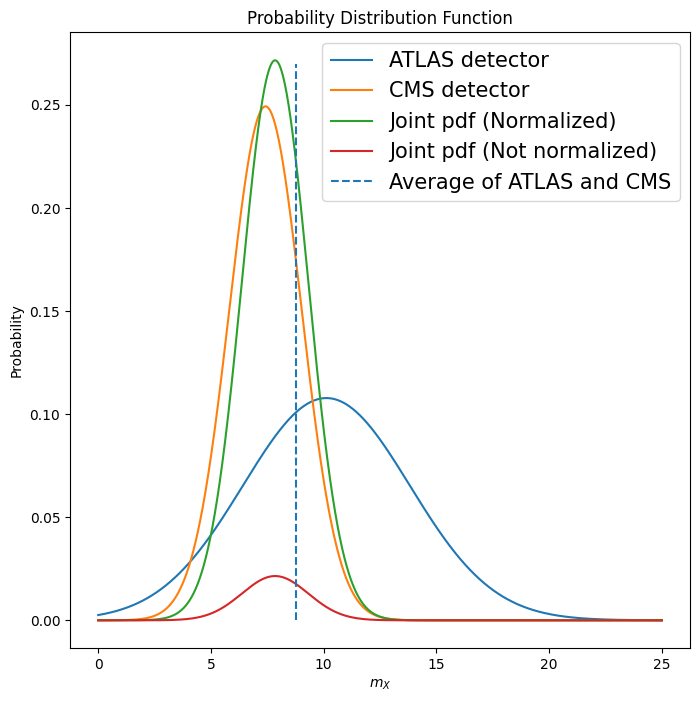

In [42]:
plt.figure(figsize=(8,8))

plt.plot(m_X_span, prob_atlas, label="ATLAS detector")
plt.plot(m_X_span, prob_cms, label="CMS detector")

plt.plot(m_X_span, joint_prob_normalized, label="Joint pdf (Normalized)")
plt.plot(m_X_span, joint_prob, label="Joint pdf (Not normalized)")
plt.vlines(mass_average, 0, 0.27, linestyles="dashed", label="Average of ATLAS and CMS")

plt.title(r"Probability Distribution Function")
plt.xlabel(r"$m_X$")
plt.ylabel(r"Probability")

plt.legend(fontsize=15)
plt.show()

**As you can see in the plot the joint pdf is much closer to the CMS team results rather than ATLAS team measurement; which was expected from their uncertainties. This is the value of mass you can report:**

In [43]:
print(m_X_max_prob, mass_average)

[7.845] 8.77


In [44]:
abs(7.845 - 8.77) / 7.845

0.11790949649458252